# Understanding Magazine Subscription Behavior

As per the context given, people are spending more time at home. Intuitively, this should lead to an increase in people reading magazines. However, there has been a decline in a magazine company’s subscription, and they want to understand the cause and how to prevent subscriber churn. Past data regarding subscriber demographics, spending patterns, interactions and subscription response is available. We will analyze the dataset to understand which features impact Response most, and build a model to predict the same.

### Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import int64
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import svm

In [2]:
df = pd.read_excel('marketing_campaign.xlsx',usecols={'Year_Birth','Education','Marital_Status','Income','Kidhome','Teenhome','Dt_Customer','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Complain','Response'})
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,172,88,88,3,8,10,4,7,0,1
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,2,1,6,2,1,1,2,5,0,0
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,111,21,42,1,8,2,10,4,0,0
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,10,3,5,2,2,0,4,6,0,0
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,46,27,15,5,5,3,6,5,0,0


In [3]:
df.dtypes

Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Complain                 int64
Response                 int64
dtype: object

### Part 1: Data Cleansing

In [4]:
df.Dt_Customer = pd.to_datetime(df.Dt_Customer, format="%Y-%m-%d")
df.Dt_Customer.max()

Timestamp('2014-06-29 00:00:00')

In [5]:
df['Days_Customer'] = (pd.to_datetime('2014-06-30')-df.Dt_Customer).dt.days
df['Age'] = 2014-df.Year_Birth
df = df[['Age','Education','Marital_Status','Income','Kidhome','Teenhome','Days_Customer','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Complain','Response']]

In [6]:
for col in df.iloc[:,[1,2]]:
    print(col,df[col].unique())

Education ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Marital_Status ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Days_Customer        2240 non-null   int64  
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

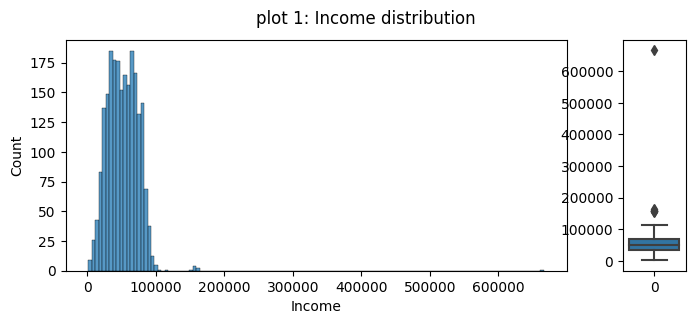

In [8]:
fig, axs = plt.subplots(1,2,figsize=(8,3),gridspec_kw={"width_ratios": (8, 1)})
fig.suptitle('plot 1: Income distribution')
sns.histplot(ax=axs[0], data=df.Income)
sns.boxplot(ax=axs[1], data=df.Income)
plt.show()

In [9]:
df = df[df.Income < 600000]

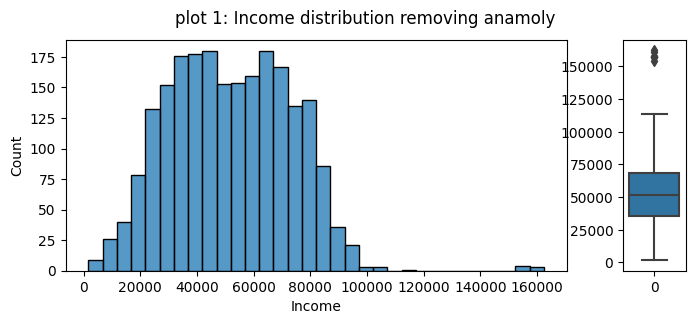

In [10]:
fig, axs = plt.subplots(1,2,figsize=(8,3),gridspec_kw={"width_ratios": (8,1)})
fig.suptitle('plot 1: Income distribution removing anamoly')
sns.histplot(ax=axs[0], data=df.Income)
sns.boxplot(ax=axs[1], data=df.Income)
plt.show()

In [11]:
df[df.Income > 140000]['Response']

164     0
617     0
655     0
687     0
1300    0
1653    0
2132    0
Name: Response, dtype: int64

In [12]:
df = df[df.Income < 140000]

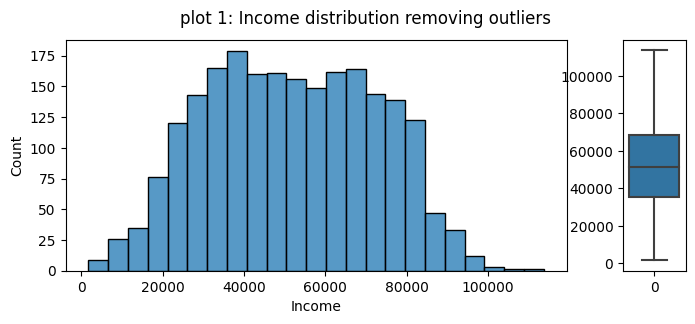

In [13]:
fig, axs = plt.subplots(1,2,figsize=(8,3),gridspec_kw={"width_ratios":(8,1)})
fig.suptitle('plot 1: Income distribution removing outliers')
sns.histplot(ax=axs[0], data=df.Income)
sns.boxplot(ax=axs[1], data=df.Income)
plt.show()

In [14]:
df.Income.median()

51301.0

In [15]:
df.Income = df.Income.fillna(df.Income.median())
df.Income = df.Income.astype(int64)

### Exploratory Data Analysis

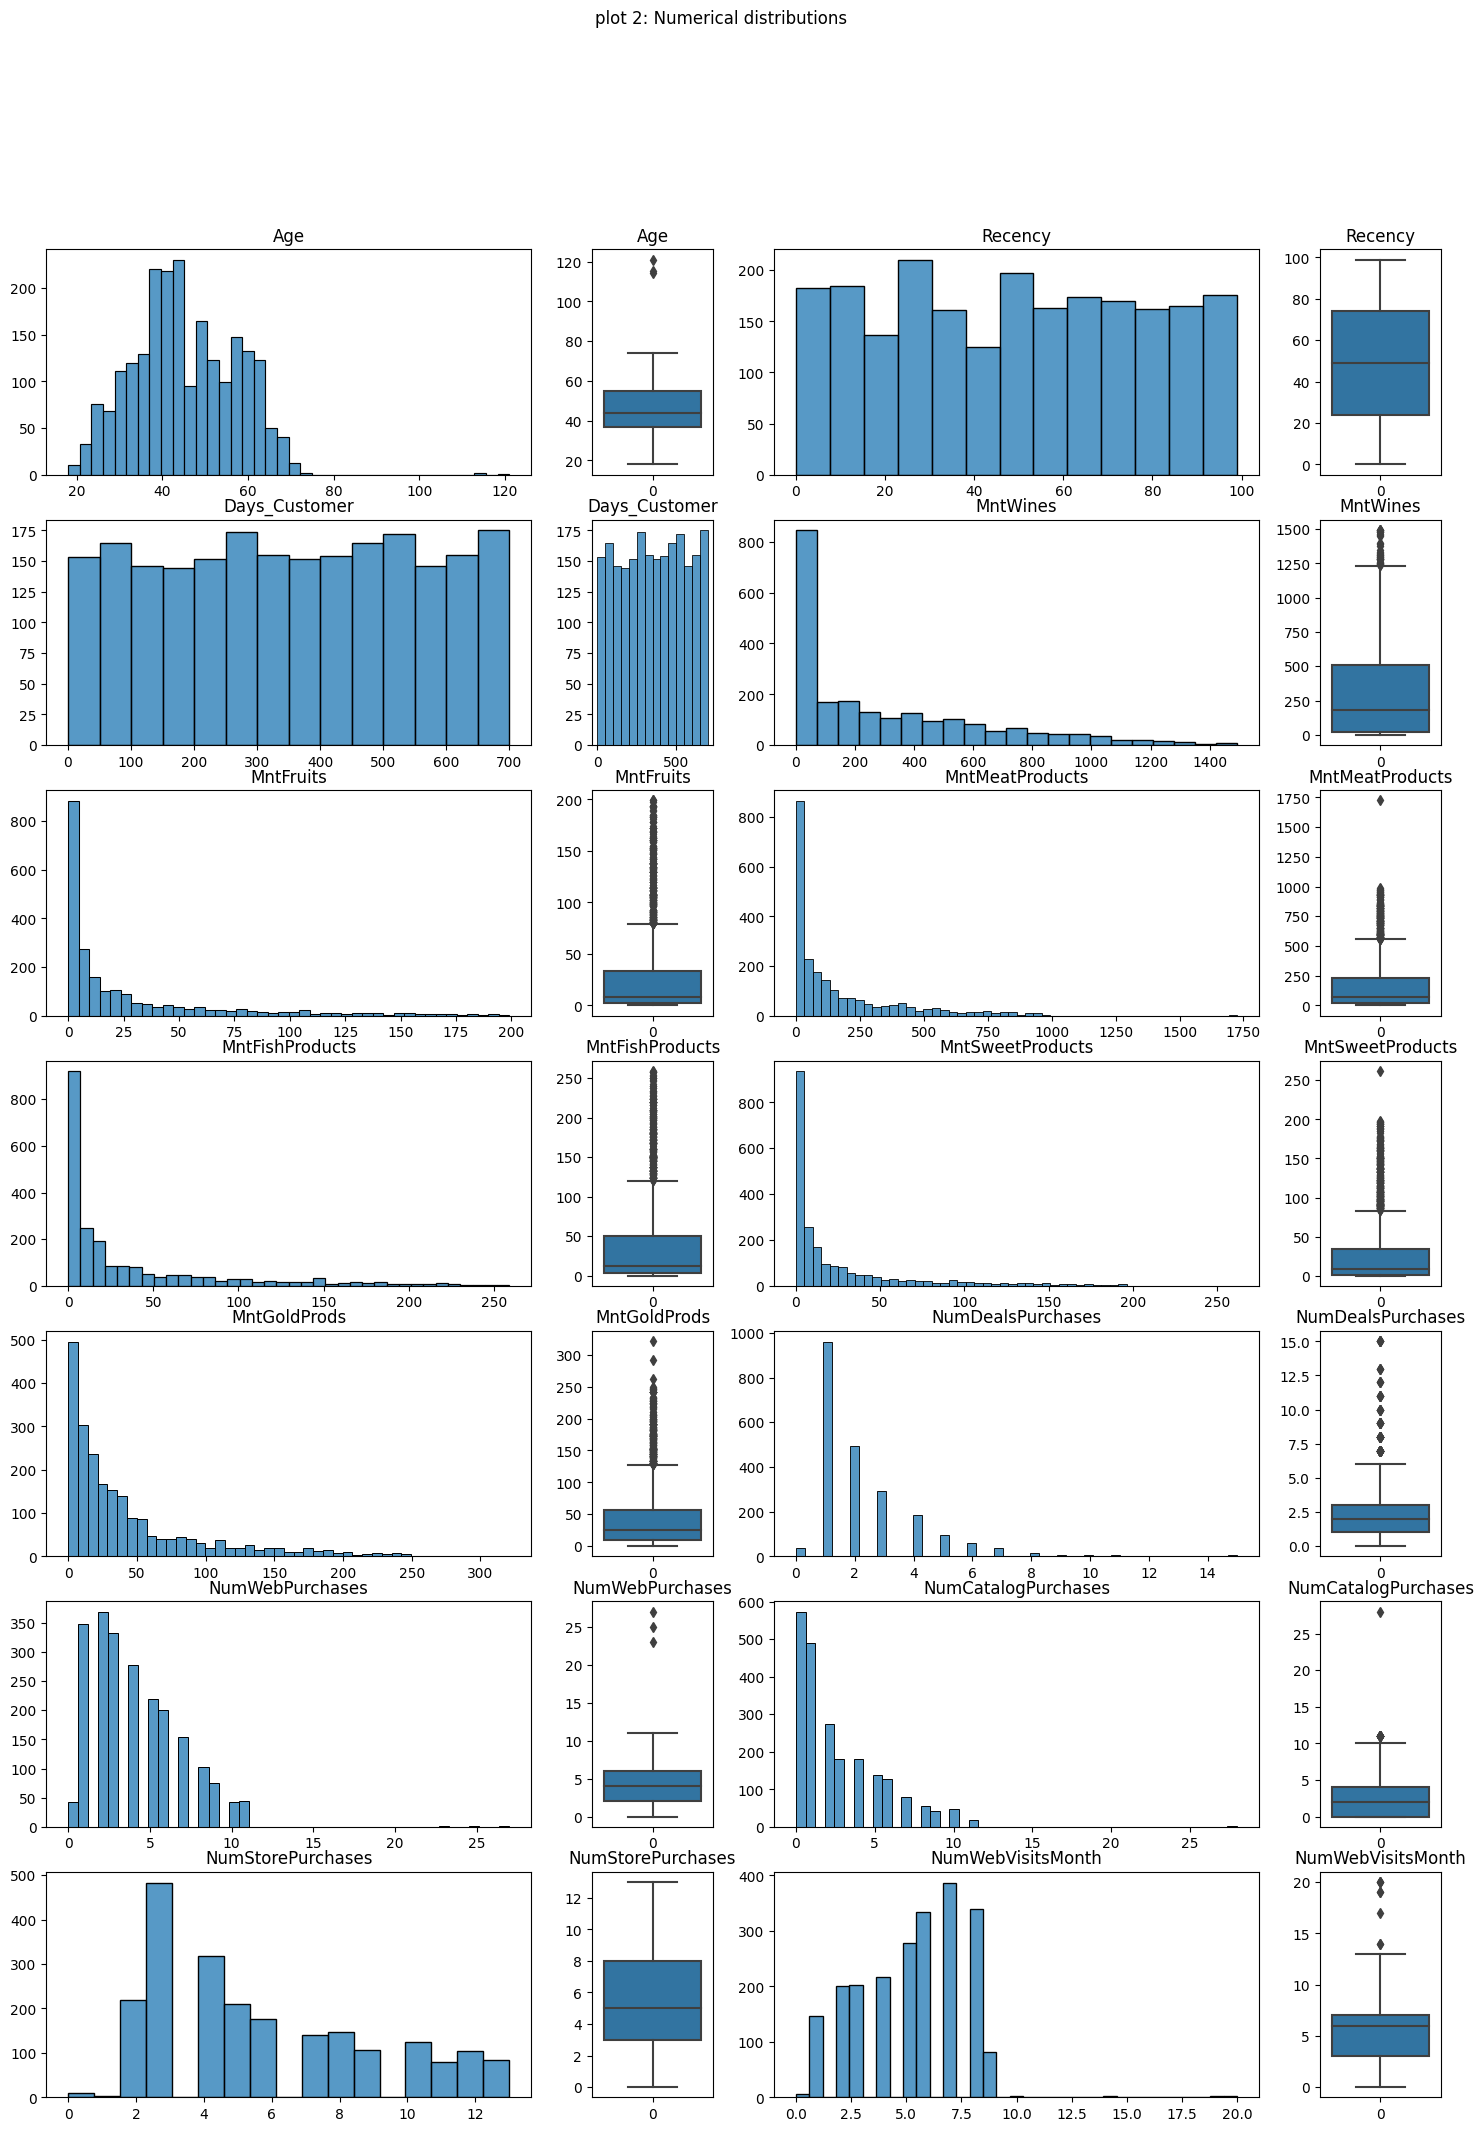

In [16]:
fig, axs = plt.subplots(7,4,figsize=(18,24),gridspec_kw={"width_ratios": (8,2,8,2)})
fig.suptitle('plot 2: Numerical distributions')
sns.histplot(ax=axs[0,0],data=df.Age).set(xlabel=None,ylabel=None,title='Age')
sns.boxplot(ax=axs[0,1],data=df.Age).set(xlabel=None,ylabel=None,title='Age')
sns.histplot(ax=axs[0,2],data=df.Recency).set(xlabel=None,ylabel=None,title='Recency')
sns.boxplot(ax=axs[0,3],data=df.Recency).set(xlabel=None,ylabel=None,title='Recency')
sns.histplot(ax=axs[1,0],data=df.Days_Customer).set(xlabel=None,ylabel=None,title='Days_Customer')
sns.histplot(ax=axs[1,1],data=df.Days_Customer).set(xlabel=None,ylabel=None,title='Days_Customer')
sns.histplot(ax=axs[1,2],data=df.MntWines).set(xlabel=None,ylabel=None,title='MntWines')
sns.boxplot(ax=axs[1,3],data=df.MntWines).set(xlabel=None,ylabel=None,title='MntWines')
sns.histplot(ax=axs[2,0],data=df.MntFruits).set(xlabel=None,ylabel=None,title='MntFruits')
sns.boxplot(ax=axs[2,1],data=df.MntFruits).set(xlabel=None,ylabel=None,title='MntFruits')
sns.histplot(ax=axs[2,2],data=df.MntMeatProducts).set(xlabel=None,ylabel=None,title='MntMeatProducts')
sns.boxplot(ax=axs[2,3],data=df.MntMeatProducts).set(xlabel=None,ylabel=None,title='MntMeatProducts')
sns.histplot(ax=axs[3,0],data=df.MntFishProducts).set(xlabel=None,ylabel=None,title='MntFishProducts')
sns.boxplot(ax=axs[3,1],data=df.MntFishProducts).set(xlabel=None,ylabel=None,title='MntFishProducts')
sns.histplot(ax=axs[3,2],data=df.MntSweetProducts).set(xlabel=None,ylabel=None,title='MntSweetProducts')
sns.boxplot(ax=axs[3,3],data=df.MntSweetProducts).set(xlabel=None,ylabel=None,title='MntSweetProducts')
sns.histplot(ax=axs[4,0],data=df.MntGoldProds).set(xlabel=None,ylabel=None,title='MntGoldProds')
sns.boxplot(ax=axs[4,1],data=df.MntGoldProds).set(xlabel=None,ylabel=None,title='MntGoldProds')
sns.histplot(ax=axs[4,2],data=df.NumDealsPurchases).set(xlabel=None,ylabel=None,title='NumDealsPurchases')
sns.boxplot(ax=axs[4,3],data=df.NumDealsPurchases).set(xlabel=None,ylabel=None,title='NumDealsPurchases')
sns.histplot(ax=axs[5,0],data=df.NumWebPurchases).set(xlabel=None,ylabel=None,title='NumWebPurchases')
sns.boxplot(ax=axs[5,1],data=df.NumWebPurchases).set(xlabel=None,ylabel=None,title='NumWebPurchases')
sns.histplot(ax=axs[5,2],data=df.NumCatalogPurchases).set(xlabel=None,ylabel=None,title='NumCatalogPurchases')
sns.boxplot(ax=axs[5,3],data=df.NumCatalogPurchases).set(xlabel=None,ylabel=None,title='NumCatalogPurchases')
sns.histplot(ax=axs[6,0],data=df.NumStorePurchases).set(xlabel=None,ylabel=None,title='NumStorePurchases')
sns.boxplot(ax=axs[6,1],data=df.NumStorePurchases).set(xlabel=None,ylabel=None,title='NumStorePurchases')
sns.histplot(ax=axs[6,2],data=df.NumWebVisitsMonth).set(xlabel=None,ylabel=None,title='NumWebVisitsMonth')
sns.boxplot(ax=axs[6,3],data=df.NumWebVisitsMonth).set(xlabel=None,ylabel=None,title='NumWebVisitsMonth')
plt.show()

In [17]:
df = df[df.Age < 100]

plot 3. Categorical + Numerical distributions


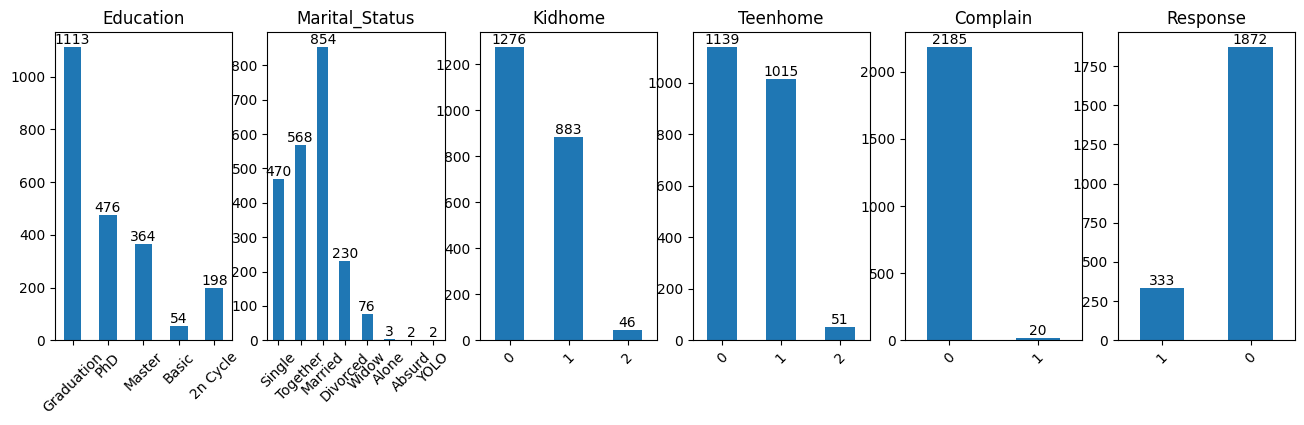

In [18]:
print('\033[1m' + 'plot 3. Categorical + Numerical distributions' +'\033[0m')
plt.figure(figsize=(16,4))
plt.subplot(1,6,1); ax = df.Education.value_counts(sort=False).plot.bar(title='Education')
ax.bar_label(ax.containers[0]); plt.xticks(rotation=45);
plt.subplot(1,6,2); ax = df.Marital_Status.value_counts(sort=False).plot.bar(title='Marital_Status')
ax.bar_label(ax.containers[0]); plt.xticks(rotation=45);
plt.subplot(1,6,3); ax = df.Kidhome.value_counts(sort=False).plot.bar(title='Kidhome')
ax.bar_label(ax.containers[0]); plt.xticks(rotation=45);
plt.subplot(1,6,4); ax = df.Teenhome.value_counts(sort=False).plot.bar(title='Teenhome')
ax.bar_label(ax.containers[0]); plt.xticks(rotation=45);
plt.subplot(1,6,5); ax = df.Complain.value_counts(sort=False).plot.bar(title='Complain')
ax.bar_label(ax.containers[0]); plt.xticks(rotation=45);
plt.subplot(1,6,6); ax = df.Response.value_counts(sort=False).plot.bar(title='Response')
ax.bar_label(ax.containers[0]); plt.xticks(rotation=45);

In [19]:
df.Marital_Status.value_counts()

Married     854
Together    568
Single      470
Divorced    230
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [20]:
df.Marital_Status = df.Marital_Status.replace('Alone','Single')
df = df[df.Marital_Status != 'Absurd']
df = df[df.Marital_Status != 'YOLO']

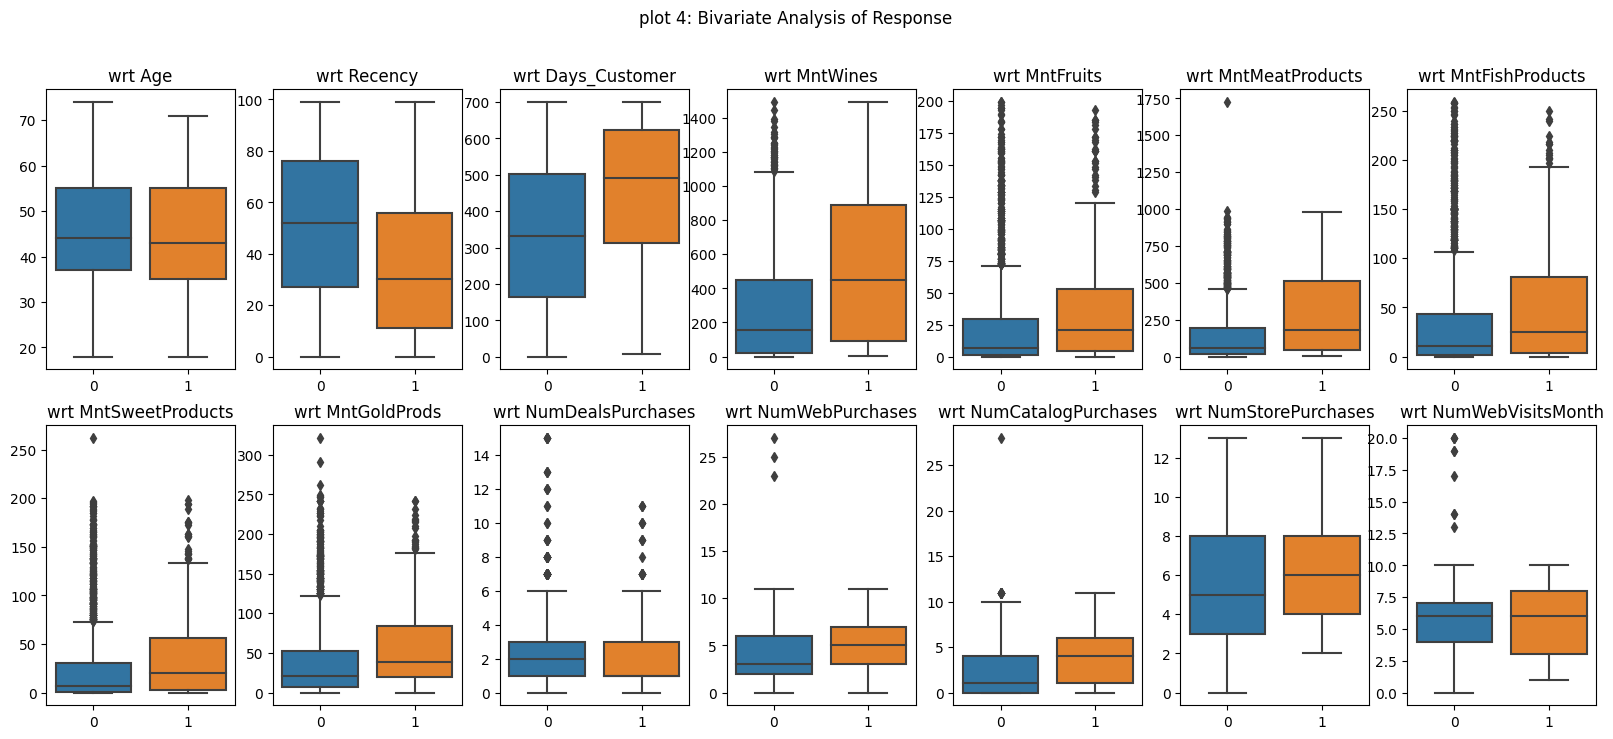

In [21]:
fig, axs = plt.subplots(2,7,figsize=(20,8))
fig.suptitle('plot 4: Bivariate Analysis of Response')
sns.boxplot(ax=axs[0,0],x=df.Response,y=df.Age).set(xlabel=None,ylabel=None,title='wrt Age')
sns.boxplot(ax=axs[0,1],x=df.Response,y=df.Recency).set(xlabel=None,ylabel=None,title='wrt Recency')
sns.boxplot(ax=axs[0,2],x=df.Response,y=df.Days_Customer).set(xlabel=None,ylabel=None,title='wrt Days_Customer')
sns.boxplot(ax=axs[0,3],x=df.Response,y=df.MntWines).set(xlabel=None,ylabel=None,title='wrt MntWines')
sns.boxplot(ax=axs[0,4],x=df.Response,y=df.MntFruits).set(xlabel=None,ylabel=None,title='wrt MntFruits')
sns.boxplot(ax=axs[0,5],x=df.Response,y=df.MntMeatProducts).set(xlabel=None,ylabel=None,title='wrt MntMeatProducts')
sns.boxplot(ax=axs[0,6],x=df.Response,y=df.MntFishProducts).set(xlabel=None,ylabel=None,title='wrt MntFishProducts')
sns.boxplot(ax=axs[1,0],x=df.Response,y=df.MntSweetProducts).set(xlabel=None,ylabel=None,title='wrt MntSweetProducts')
sns.boxplot(ax=axs[1,1],x=df.Response,y=df.MntGoldProds).set(xlabel=None,ylabel=None,title='wrt MntGoldProds')
sns.boxplot(ax=axs[1,2],x=df.Response,y=df.NumDealsPurchases).set(xlabel=None,ylabel=None,title='wrt NumDealsPurchases')
sns.boxplot(ax=axs[1,3],x=df.Response,y=df.NumWebPurchases).set(xlabel=None,ylabel=None,title='wrt NumWebPurchases')
sns.boxplot(ax=axs[1,4],x=df.Response,y=df.NumCatalogPurchases).set(xlabel=None,ylabel=None,title='wrt NumCatalogPurchases')
sns.boxplot(ax=axs[1,5],x=df.Response,y=df.NumStorePurchases).set(xlabel=None,ylabel=None,title='wrt NumStorePurchases')
sns.boxplot(ax=axs[1,6],x=df.Response,y=df.NumWebVisitsMonth).set(xlabel=None,ylabel=None,title='wrt NumWebVisitsMonth')
plt.show()

In [22]:
tmp = pd.crosstab(df.Education,df.Response,margins=True)[:-1]
tmp['zeros'] = 0
tmp = tmp[['zeros',0,1,'All']]
tmp.style.background_gradient(axis=1).hide(['zeros','All'],axis=1)

Response,0,1
Education,,
2n Cycle,176,22
Basic,52,2
Graduation,961,151
Master,307,56
PhD,374,100


In [23]:
tmp = pd.crosstab(df.Marital_Status,df.Response,margins=True)[:-1]
tmp['zeros'] = 0
tmp = tmp[['zeros',0,1,'All']]
tmp.style.background_gradient(axis=1).hide(['zeros','All'],axis=1)

Response,0,1
Marital_Status,,
Divorced,182,48
Married,756,98
Single,366,107
Together,508,60
Widow,58,18


In [24]:
tmp = pd.crosstab(df.Kidhome,df.Response,margins=True)[:-1]
tmp['zeros'] = 0
tmp = tmp[['zeros',0,1,'All']]
tmp.style.background_gradient(axis=1).hide(['zeros','All'],axis=1)

Response,0,1
Kidhome,,
0,1053,219
1,773,110
2,44,2


In [25]:
tmp = pd.crosstab(df.Teenhome,df.Response,margins=True)[:-1]
tmp['zeros'] = 0
tmp = tmp[['zeros',0,1,'All']]
tmp.style.background_gradient(axis=1).hide(['zeros','All'],axis=1)

Response,0,1
Teenhome,,
0,902,235
1,922,91
2,46,5


In [26]:
tmp = pd.crosstab(df.Complain,df.Response,margins=True)[:-1]
tmp['zeros'] = 0
tmp = tmp[['zeros',0,1,'All']]
tmp.style.background_gradient(axis=1).hide(['zeros','All'],axis=1)

Response,0,1
Complain,,
0,1853,328
1,17,3


C:\Users\soura\AppData\Local\Temp\ipykernel_2084\307147042.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.iloc[:,0:19].corr(),annot=True).set(title='plot 5: correlation matrix');


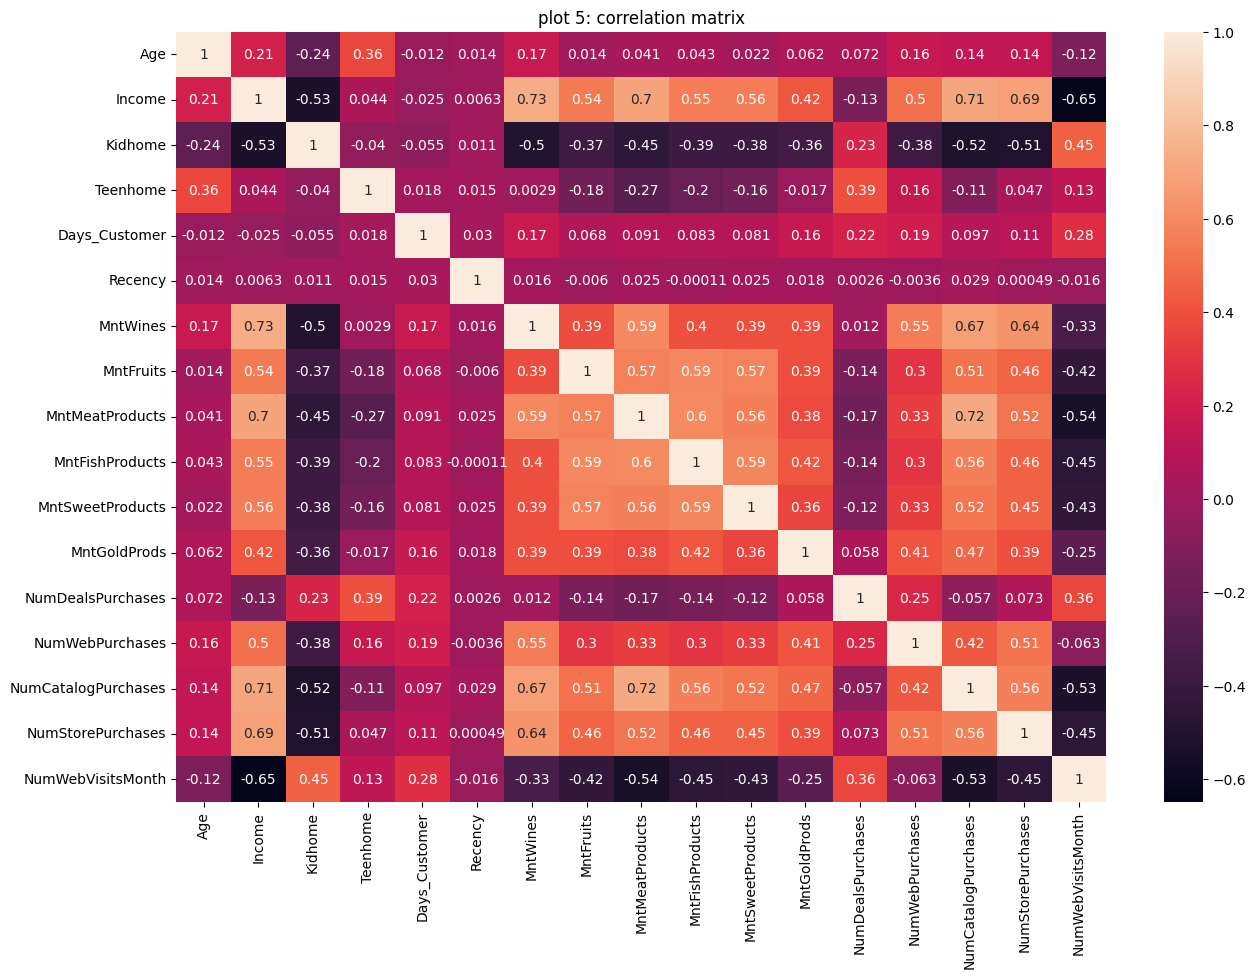

In [27]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data=df.iloc[:,0:19].corr(),annot=True).set(title='plot 5: correlation matrix');

### Logistic Regression Model

In [28]:
df_ec = pd.get_dummies(df,columns=["Education","Marital_Status"],drop_first=True)

In [29]:
y_logr=df_ec[['Response']]
x_logr=df_ec.drop(['Response'],axis=1)

from sklearn.model_selection import train_test_split
x_train, x_test, z_train, z_test = train_test_split(x_logr, y_logr, test_size=0.20)

In [30]:
Xlog2 = sm.add_constant(x_train) 
logr_model = sm.Logit(z_train, Xlog2) 
logr_fit = logr_model.fit()
print(logr_fit.summary())

Optimization terminated successfully.
         Current function value: 0.288678
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                 1760
Model:                          Logit   Df Residuals:                     1733
Method:                           MLE   Df Model:                           26
Date:                Mon, 30 Jan 2023   Pseudo R-squ.:                  0.3264
Time:                        04:37:11   Log-Likelihood:                -508.07
converged:                       True   LL-Null:                       -754.30
Covariance Type:            nonrobust   LLR p-value:                 1.272e-87
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -4.5017      0.798     -5.643      0.000      -6.065   

In [31]:
Xlog2 = sm.add_constant(x_train.drop(['Age','MntSweetProducts','Complain','NumWebPurchases','Kidhome'],axis=1))
logr_model = sm.Logit(z_train, Xlog2) 
logr_fit = logr_model.fit()
print(logr_fit.summary())

Optimization terminated successfully.
         Current function value: 0.289339
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                 1760
Model:                          Logit   Df Residuals:                     1738
Method:                           MLE   Df Model:                           21
Date:                Mon, 30 Jan 2023   Pseudo R-squ.:                  0.3249
Time:                        04:37:11   Log-Likelihood:                -509.24
converged:                       True   LL-Null:                       -754.30
Covariance Type:            nonrobust   LLR p-value:                 1.711e-90
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -4.6252      0.729     -6.344      0.000      -6.054   

In [32]:
logreg = LogisticRegression(max_iter=2000)
logreg.fit(x_train,z_train.values.ravel())
z_pred=logreg.predict(x_test)
confusion_matrix(z_test, z_pred)

array([[365,  15],
       [ 47,  14]], dtype=int64)

In [33]:
logreg.score(x_test, z_test)

0.8594104308390023

### Support Vector Machine Model

In [34]:
svm_model = svm.SVC(kernel='linear')
svm_model.fit(x_train, z_train.values.ravel())
z_pred = svm_model.predict(x_test)
confusion_matrix(z_test, z_pred)

array([[370,  10],
       [ 50,  11]], dtype=int64)

In [35]:
svm_model.score(x_test, z_test)

0.8639455782312925

# Conclusion

After thoroughly cleaning and analyzing the data, we built two models to predict customer churn. There is a good positive correlation between Income and each of Amount on Wines, Amount of Meat Products and Number of Catalog purchases, which is logical. The exploration of data suggested that poor Recency of Last Purchase and lower Enrolment Days may lead to higher unsubscriptions (i.e., customers who are either new or have not recently placed an order). Logistic Regression indicated these three variables are significant, however, there are other features having with the highest impact on unsubscription. Higher teen kids, higher store purchases, lower web purchases are most likely to cause people to unsubscribe. Couples and lower education may also lead to unsubscription.

The Support Vector Model is better at predicting customers who might unsubscribe with precision of 97.4% and overall accuracy of 86.4% and is recommended. The company can use this data to retain subscribers and direct marketing efforts to those more likely to unsubscribe. Customers should be encouraged to make web purchases instead of store purchases, and single customers with no teen kids should be focused upon. The company also needs to see how customers will make frequent purchases to improve the recency of last purchase.